<a href="https://colab.research.google.com/github/FarzanaAdiba/ML_Assignment_03/blob/main/ML__Assignment3P1_Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten


In [ ]:
#importing mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
#normalizing the dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)

In [ ]:
#Creating CNN Model
model=tf.keras.models.Sequential()
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(Conv2D(24, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(24, (3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

In [ ]:
#compiling model
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model.build(input_shape=(1,28,28,1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (1, 28, 28, 16)           160       
                                                                 
 conv2d_39 (Conv2D)          (1, 14, 14, 16)           2320      
                                                                 
 max_pooling2d_19 (MaxPoolin  (1, 7, 7, 16)            0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (1, 7, 7, 24)             3480      
                                                                 
 conv2d_41 (Conv2D)          (1, 4, 4, 24)             5208      
                                                                 
 max_pooling2d_20 (MaxPoolin  (1, 2, 2, 24)            0         
 g2D)                                                 

In [ ]:
model1 = model
# Train the model.
history1 = model1.fit(
    x_train,
    y_train, validation_split = 0.2, 
    batch_size=64,epochs=25)


Epoch 1/25
750/750 [==============================] - 10s 11ms/step - loss: 1.0635 - accuracy: 0.6019 - val_loss: 0.3357 - val_accuracy: 0.9080
Epoch 2/25
750/750 [==============================] - 8s 11ms/step - loss: 0.2431 - accuracy: 0.9313 - val_loss: 0.1499 - val_accuracy: 0.9582
Epoch 3/25
750/750 [==============================] - 5s 6ms/step - loss: 0.1310 - accuracy: 0.9645 - val_loss: 0.1368 - val_accuracy: 0.9659
Epoch 4/25
750/750 [==============================] - 5s 6ms/step - loss: 0.0966 - accuracy: 0.9734 - val_loss: 0.0854 - val_accuracy: 0.9770
Epoch 5/25
750/750 [==============================] - 5s 6ms/step - loss: 0.0778 - accuracy: 0.9786 - val_loss: 0.0778 - val_accuracy: 0.9800
Epoch 6/25
750/750 [==============================] - 5s 6ms/step - loss: 0.0659 - accuracy: 0.9818 - val_loss: 0.0713 - val_accuracy: 0.9806
Epoch 7/25
750/750 [==============================] - 5s 6ms/step - loss: 0.0570 - accuracy: 0.9843 - val_loss: 0.0808 - val_accuracy: 0.9790
Epo

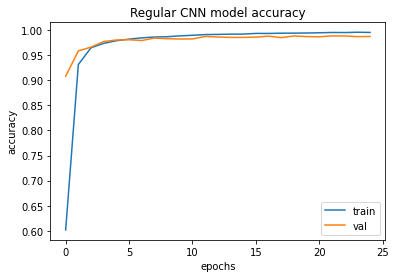

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Regular CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
# Evaluation
score = model1.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0557 - accuracy: 0.9890
Test loss: 0.055713750422000885
Test accuracy: 0.9890000224113464


###Inverted CNN

In [ ]:
#Creating Inverted CNN Model
Inv_model=tf.keras.models.Sequential()

Inv_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
Inv_model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
Inv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
Inv_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
Inv_model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
Inv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
Inv_model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
Inv_model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
Inv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
Inv_model.add(Conv2D(24, (3, 3), padding='same', activation='relu'))
Inv_model.add(Conv2D(24, (3, 3), strides=(2, 2), padding='same', activation='relu'))
Inv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
Inv_model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
Inv_model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
Inv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

Inv_model.add(tf.keras.layers.Flatten())
Inv_model.add(tf.keras.layers.Dense(256))
Inv_model.add(tf.keras.layers.Activation('relu'))
Inv_model.add(tf.keras.layers.Dense(10))
Inv_model.add(tf.keras.layers.Activation('softmax'))

In [ ]:
#compiling model
Inv_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
Inv_model.build(input_shape=(1,28,28,1))
Inv_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (1, 28, 28, 128)          1280      
                                                                 
 conv2d_49 (Conv2D)          (1, 14, 14, 128)          147584    
                                                                 
 max_pooling2d_24 (MaxPoolin  (1, 7, 7, 128)           0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (1, 7, 7, 64)             73792     
                                                                 
 conv2d_51 (Conv2D)          (1, 4, 4, 64)             36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (1, 2, 2, 64)            0         
 g2D)                                                 

In [ ]:
model2 = Inv_model
# Train the model.
history2 = model2.fit(
    x_train,
    y_train, validation_split = 0.2, 
    batch_size=64,epochs=25)


Epoch 1/25
750/750 [==============================] - 10s 12ms/step - loss: 0.8576 - accuracy: 0.6700 - val_loss: 0.1798 - val_accuracy: 0.9507
Epoch 2/25
750/750 [==============================] - 10s 13ms/step - loss: 0.1468 - accuracy: 0.9594 - val_loss: 0.1160 - val_accuracy: 0.9698
Epoch 3/25
750/750 [==============================] - 9s 12ms/step - loss: 0.0861 - accuracy: 0.9767 - val_loss: 0.0769 - val_accuracy: 0.9797
Epoch 4/25
750/750 [==============================] - 9s 11ms/step - loss: 0.0631 - accuracy: 0.9831 - val_loss: 0.0669 - val_accuracy: 0.9829
Epoch 5/25
750/750 [==============================] - 8s 11ms/step - loss: 0.0491 - accuracy: 0.9865 - val_loss: 0.0623 - val_accuracy: 0.9837
Epoch 6/25
750/750 [==============================] - 9s 12ms/step - loss: 0.0444 - accuracy: 0.9875 - val_loss: 0.0606 - val_accuracy: 0.9855
Epoch 7/25
750/750 [==============================] - 9s 12ms/step - loss: 0.0365 - accuracy: 0.9906 - val_loss: 0.0500 - val_accuracy: 0.98

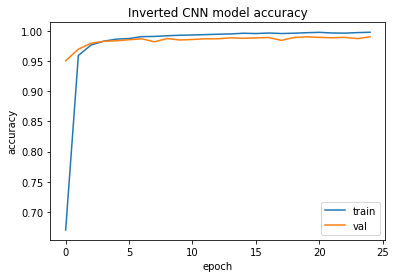

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Inverted CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
# Evaluation
score = model2.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0531 - accuracy: 0.9903
Test loss: 0.05314522609114647
Test accuracy: 0.9902999997138977


###Hour-glass shaped CNN where the number of filters will increase

In [ ]:
#Creating CNN Model
hg_model=tf.keras.models.Sequential()
hg_model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(Conv2D(24, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(24, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(Conv2D(24, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(24, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
hg_model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
hg_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
hg_model.add(tf.keras.layers.Flatten())
hg_model.add(tf.keras.layers.Dense(256))
hg_model.add(tf.keras.layers.Activation('relu'))
hg_model.add(tf.keras.layers.Dense(10))
hg_model.add(tf.keras.layers.Activation('softmax'))

In [ ]:
hg_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
hg_model.build(input_shape=(1,28,28,1))
hg_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (1, 28, 28, 16)           160       
                                                                 
 conv2d_59 (Conv2D)          (1, 14, 14, 16)           2320      
                                                                 
 max_pooling2d_29 (MaxPoolin  (1, 7, 7, 16)            0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (1, 7, 7, 24)             3480      
                                                                 
 conv2d_61 (Conv2D)          (1, 4, 4, 24)             5208      
                                                                 
 max_pooling2d_30 (MaxPoolin  (1, 2, 2, 24)            0         
 g2D)                                                 

In [ ]:
model3 = hg_model
# Train the model.
history3 = model3.fit(
    x_train,
    y_train, validation_split = 0.2, 
    batch_size=64,epochs=25)


Epoch 1/25
750/750 [==============================] - 8s 9ms/step - loss: 2.3014 - accuracy: 0.1131 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 2/25
750/750 [==============================] - 7s 9ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 3/25
750/750 [==============================] - 6s 8ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 4/25
750/750 [==============================] - 7s 9ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 5/25
750/750 [==============================] - 7s 9ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 6/25
750/750 [==============================] - 7s 9ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 7/25
750/750 [==============================] - 6s 8ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 

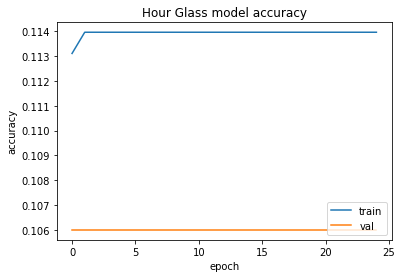

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Hour Glass model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
# Evaluation
score = model3.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 2.3010 - accuracy: 0.1135
Test loss: 2.3009707927703857
Test accuracy: 0.11349999904632568
